In [2]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sbs
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
catan=pd.read_csv('./catanstats.csv')
for i in range(0, 199, 4):
    if catan.me[i] == 1:
        catan.me[i + 1] = 2
        catan.me[i + 2] = 3
        catan.me[i + 3] = 4
    elif catan.me[i + 1] == 1:
        catan.me[i] = 4
        catan.me[i + 2] = 2
        catan.me[i + 3] = 3
    elif catan.me[i + 2] == 1:
        catan.me[i] = 3
        catan.me[i + 1] = 4
        catan.me[i + 3] = 2
    elif catan.me[i + 3] == 1:
        catan.me[i] = 2
        catan.me[i + 1] = 3
        catan.me[i + 2] = 4
catan=catan.rename(columns={'settlement1':'set1a', 'Unnamed: 17':'set1b', 'Unnamed: 19':'set1c', 'settlement2':'set2a', 'Unnamed: 23':'set2b', 'Unnamed: 25':'set2c'})
def oldtonew(old,new):
    catan[new]=catan[old].map({'L':0, 'C':1, 'S':2, 'W':3, 'O':4, 'D': 5, '2L':6, '2C':7, '2S':8, '2W':9, '2O':10, '3G':11, 'B':5})
oldres=['Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26']
newres=['re1a', 're1b', 're1c', 're2a', 're2b', 're2c']

for old,new in zip(oldres,newres):
    oldtonew(old,new)
catan = catan.drop(['Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26'], axis=1)
catan['win/loss']=catan['points'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10: 1, 11: 1, 12: 1})


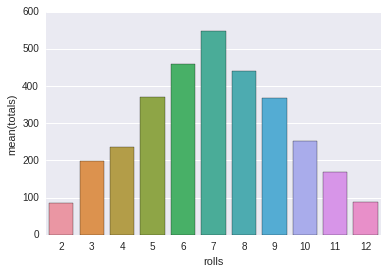

In [4]:


sums = pd.DataFrame(catan[['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum()/4, columns=['totals'])
sums['rolls'] = range(2, 13)

sbs.barplot(x='rolls',y='totals',data=sums)

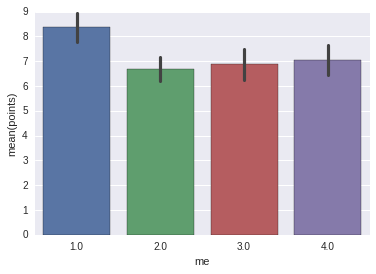

In [5]:
sbs.barplot(x='me',y='points',data=catan,label='points')

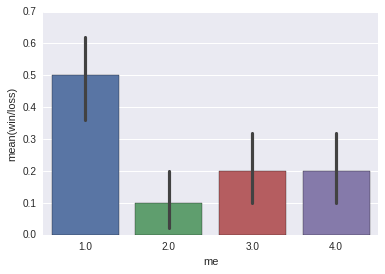

In [6]:
sbs.barplot(x='me',y='win/loss',data=catan)

In [8]:
X = catan[['me', 'production', 'robberCardsGain', 'totalLoss']]
Y = catan['win/loss']


In [50]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=5)

In [51]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=5)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [53]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.81999999999999995

In [54]:
(y_pred == y_test).value_counts()

True     41
False     9
Name: win/loss, dtype: int64